In [1]:
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import random
from config import api_key
import openweathermapy.core as owm
from citipy import citipy

In [2]:
# get the OpenWeatherMap url
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "imperial"

# Build partial query URL
query_url = f"{url}units={units}&appid={api_key}&q="
query_url


'http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=e2a6ea9786b38b55cafa2a4fcad7ed7b&q='

In [3]:
# list to hold the coordinates and cities
coordinates = []

# generate random coordinate pairs of latitude and longitudes
lat = np.random.uniform(low = -90, high = 90, size = 1500)
lon = np.random.uniform(low = -180, high = 180, size = 1500)
coordinates = zip(lat,lon)


In [4]:
# creating a DataFrame to hold required values
cities = []


for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat,lon))
   
    
cities_list = []
for city in cities:
    name = city.city_name
    country = city.country_code
    cities_list.append(name)
    


city_name = []
lat = []
temp = []
cloudiness = []
windspeed = []
humidity = []
 
row_count = 1
for city in cities_list:
    print(f"Processing weather information for city {row_count}|{city}")
    print(query_url + str(city))
    row_count+=1


Processing weather information for city 1|hilo
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=e2a6ea9786b38b55cafa2a4fcad7ed7b&q=hilo
Processing weather information for city 2|nemuro
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=e2a6ea9786b38b55cafa2a4fcad7ed7b&q=nemuro
Processing weather information for city 3|srikakulam
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=e2a6ea9786b38b55cafa2a4fcad7ed7b&q=srikakulam
Processing weather information for city 4|new norfolk
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=e2a6ea9786b38b55cafa2a4fcad7ed7b&q=new norfolk
Processing weather information for city 5|dikson
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=e2a6ea9786b38b55cafa2a4fcad7ed7b&q=dikson
Processing weather information for city 6|hilo
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=e2a6ea9786b38b55cafa2a4fcad7ed7b&q=hilo
Processing weather information for c

http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=e2a6ea9786b38b55cafa2a4fcad7ed7b&q=zaraza
Processing weather information for city 736|deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=e2a6ea9786b38b55cafa2a4fcad7ed7b&q=deputatskiy
Processing weather information for city 737|uturoa
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=e2a6ea9786b38b55cafa2a4fcad7ed7b&q=uturoa
Processing weather information for city 738|albany
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=e2a6ea9786b38b55cafa2a4fcad7ed7b&q=albany
Processing weather information for city 739|paysandu
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=e2a6ea9786b38b55cafa2a4fcad7ed7b&q=paysandu
Processing weather information for city 740|yellowknife
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=e2a6ea9786b38b55cafa2a4fcad7ed7b&q=yellowknife
Processing weather information for city 741|rikitea
http://ap

http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=e2a6ea9786b38b55cafa2a4fcad7ed7b&q=maldonado
Processing weather information for city 1236|kailua
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=e2a6ea9786b38b55cafa2a4fcad7ed7b&q=kailua
Processing weather information for city 1237|portland
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=e2a6ea9786b38b55cafa2a4fcad7ed7b&q=portland
Processing weather information for city 1238|gwadar
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=e2a6ea9786b38b55cafa2a4fcad7ed7b&q=gwadar
Processing weather information for city 1239|rikitea
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=e2a6ea9786b38b55cafa2a4fcad7ed7b&q=rikitea
Processing weather information for city 1240|inirida
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=e2a6ea9786b38b55cafa2a4fcad7ed7b&q=inirida
Processing weather information for city 1241|hermanus
http://api.open

In [5]:
for city_count in cities_list:
    response = requests.get(query_url + str(city_count)).json()
    try:
        lat.append(response['coord']['lat'])
    except:
        continue
    city_name.append(response['name'])
    temp.append(response['main']['temp'])
    windspeed.append(response['wind']['speed'])
    cloudiness.append(response['clouds']['all'])
    humidity.append(response['main']['humidity'])

In [6]:
city_df=pd.DataFrame({"City":city_name,
                      "Latitude":lat,
                      "Temperature":temp,
                      "Cloudiness":cloudiness,
                      "Windspeed":windspeed,
                      "Humidity":humidity,
                      })
city_df.head()

,City,Cloudiness,Humidity,Latitude,Temperature,Windspeed
0,Hilo,1,88,19.71,73.40,6.93
1,Nemuro,75,81,43.32,46.40,8.05
2,Srikakulam,0,92,18.29,85.61,10.76
3,New Norfolk,20,40,-42.78,69.80,17.22
4,Dikson,36,91,73.51,1.55,18.81


In [7]:
# exporting data frame to a csv file
csv_data = city_df.to_csv('Weather Data.csv')

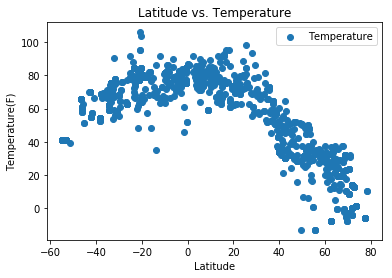

In [8]:
# scatter plot of Temperature vs. Latitude
x_axis = city_df['Latitude']
y_axis = city_df['Temperature']
plt.scatter(x_axis,y_axis)
plt.gca().set(xlabel='Latitude',ylabel='Temperature(F)',title='Latitude vs. Temperature')
plt.legend(loc = 'best')
plt.savefig('Scatter plot L-T.png')
plt.show()

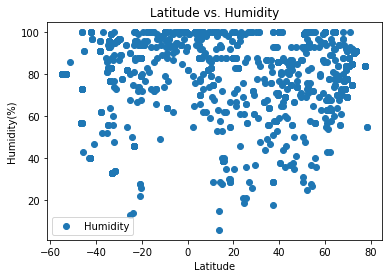

In [9]:
# scatter plot of Humidity vs. Latitude
x_axis = city_df['Latitude']
y_axis = city_df['Humidity']
plt.scatter(x_axis,y_axis)
plt.gca().set(xlabel='Latitude',ylabel='Humidity(%)',title='Latitude vs. Humidity')
plt.legend(loc = 'best')
plt.savefig('Scatter plot L-H.png')
plt.show()

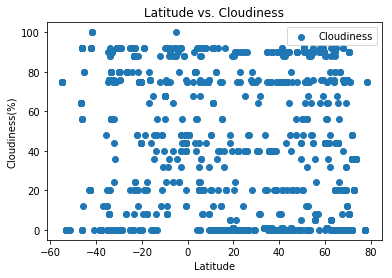

In [10]:
# scatter plot of Cloudiness vs. Latitude
x_axis = city_df['Latitude']
y_axis = city_df['Cloudiness']
plt.scatter(x_axis,y_axis)
plt.gca().set(xlabel='Latitude',ylabel='Cloudiness(%)',title='Latitude vs. Cloudiness')
plt.legend(loc = 'best')
plt.savefig('Scatter plot L-C.png')
plt.show()

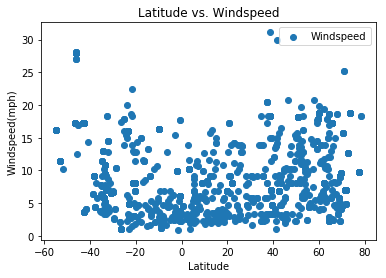

In [11]:
# scatter plot of Windspeed vs. Latitude
x_axis = city_df['Latitude']
y_axis = city_df['Windspeed']
plt.scatter(x_axis,y_axis)
plt.gca().set(xlabel='Latitude',ylabel='Windspeed(mph)',title='Latitude vs. Windspeed')
plt.legend(loc = 'best')
plt.savefig('Scatter plot L-WS.png')
plt.show()